<a href="https://colab.research.google.com/github/aliar5/Machine-Learning-Engineering/blob/main/HW2_Q2ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Question 2: Accuracy for even digits using k-NN: 0.9881851636645361


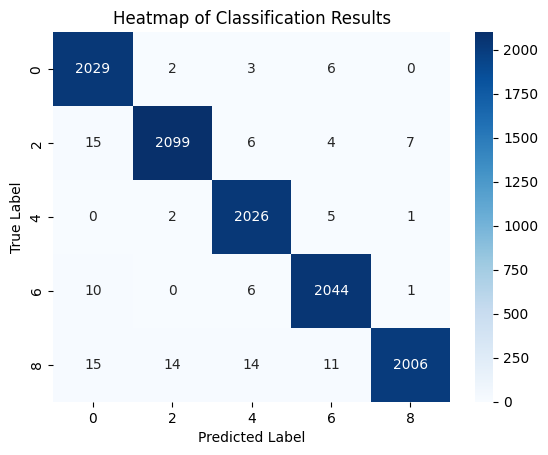

In [2]:
#Question 2

from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(X_train_mnist, y_train_mnist), (X_test_mnist, y_test_mnist) = mnist.load_data()
X_train_mnist = X_train_mnist.reshape(-1, 28 * 28)
X_test_mnist = X_test_mnist.reshape(-1, 28 * 28)
X = np.vstack([X_train_mnist, X_test_mnist])
y = np.hstack([y_train_mnist, y_test_mnist])

# Filter for even digits only
mask = y % 2 == 0
X_even = X[mask]
y_even = y[mask]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_even, y_even, test_size=0.3, random_state=42)

# Train k-NN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict and analyze results
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Question 2: Accuracy for even digits using k-NN:", accuracy)

# Create heatmap of classification results
conf_matrix = np.zeros((5, 5))
for true, pred in zip(y_test, y_pred):
    conf_matrix[true // 2, pred // 2] += 1

sns.heatmap(conf_matrix, annot=True, fmt='.0f', cmap='Blues', xticklabels=[0, 2, 4, 6, 8], yticklabels=[0, 2, 4, 6, 8])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Heatmap of Classification Results')
plt.show()